In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam #for MAC configuration for windows use directly from optimizers

## Visualize single audio

In [2]:
random_file = "rock.wav"

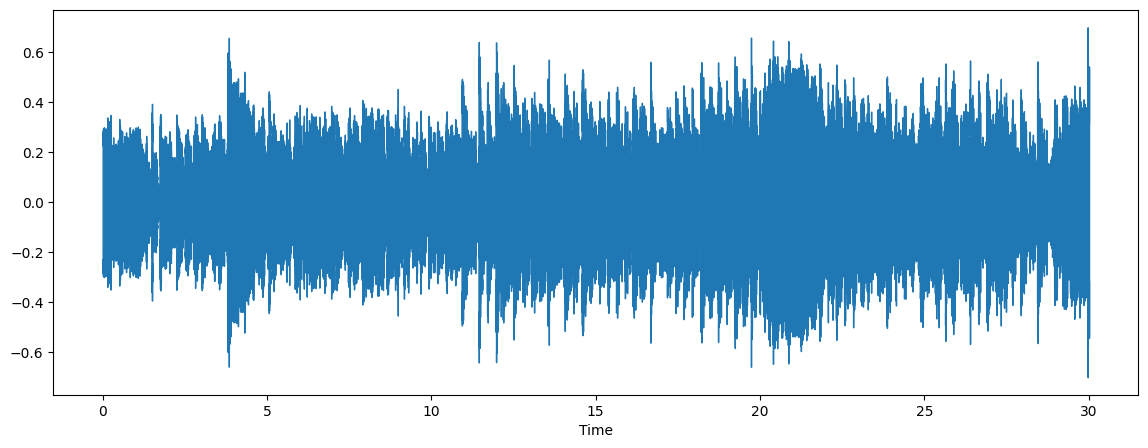

In [3]:
y, sr = librosa.load(random_file, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)
# print(30*44100)
# print(y.shape)

## Play audio

In [ ]:
from IPython.display import Audio
Audio(data=y,rate=sr)

## Visualizing chunks of audio

661794 88200 22050
15


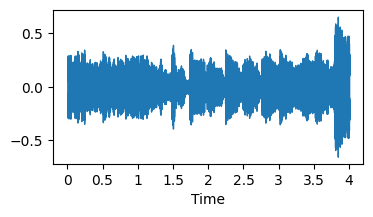

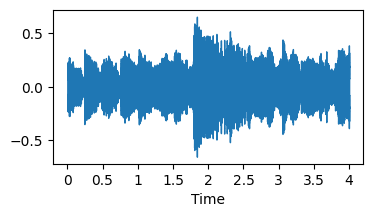

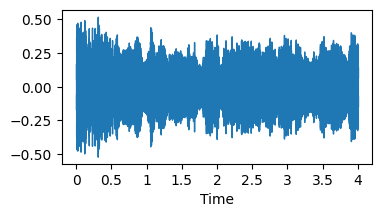

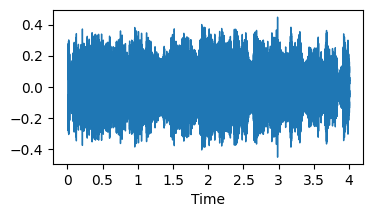

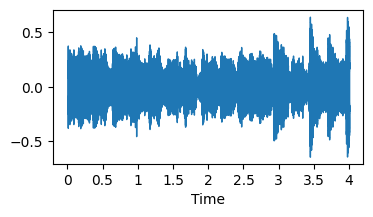

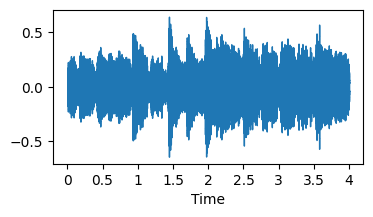

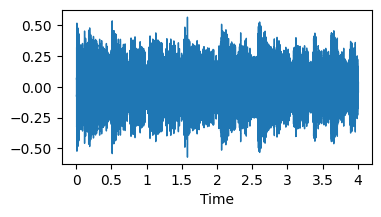

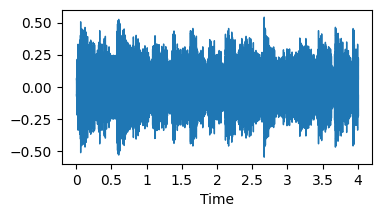

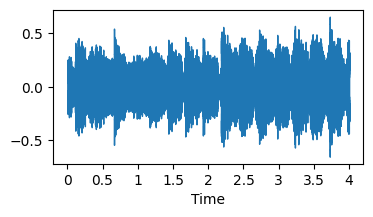

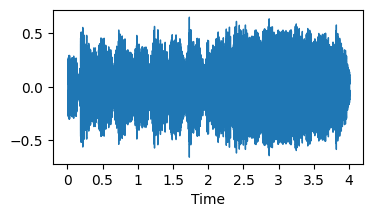

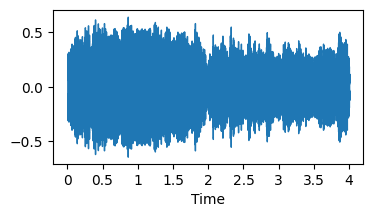

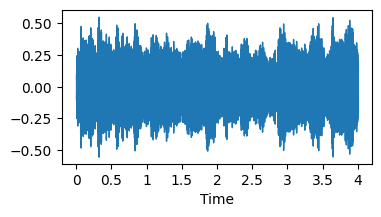

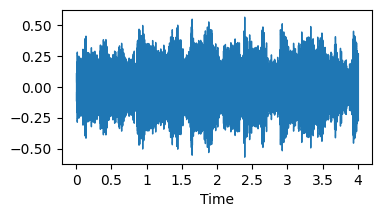

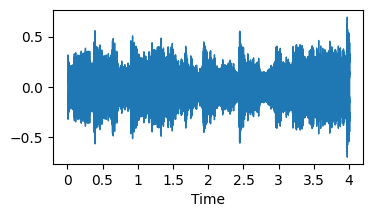

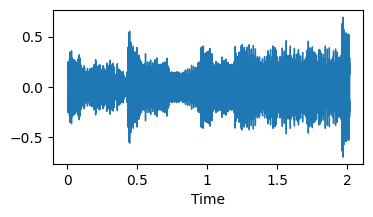

In [4]:
audio_path = "rock.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds To maintain the previous information of the audio sample

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr
print(len(y), chunk_samples, sr)

# Calculate the number of chunks
#window size is of 2
#First sample 0 to 4 then second sample is 2 to 6
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1 
print(num_chunks) #30 sec ko 15 huna parcha

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

## Melspectrogram Visualization

In [5]:
random_file_name = "rock.wav"
y,sr = librosa.load(random_file_name,sr=44100)

In [6]:
#Plotting Melspectrogram of Entire Audio
def plot_melspectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

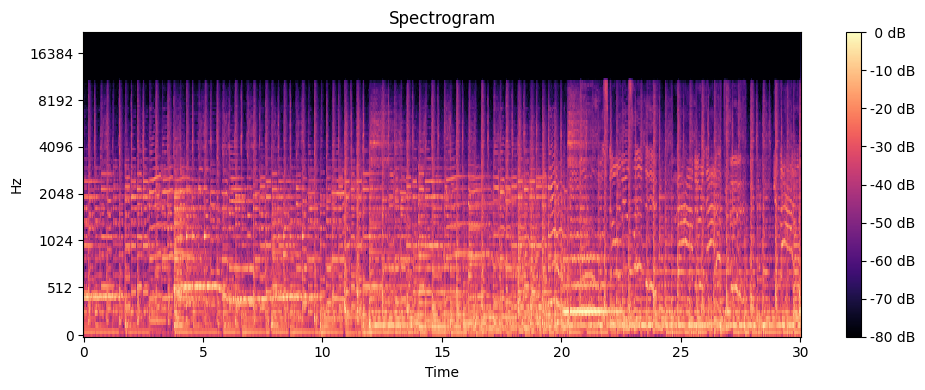

In [7]:
plot_melspectrogram(y, sr)

In [8]:
#Melspectrogram for audio chunks
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

(128, 345)


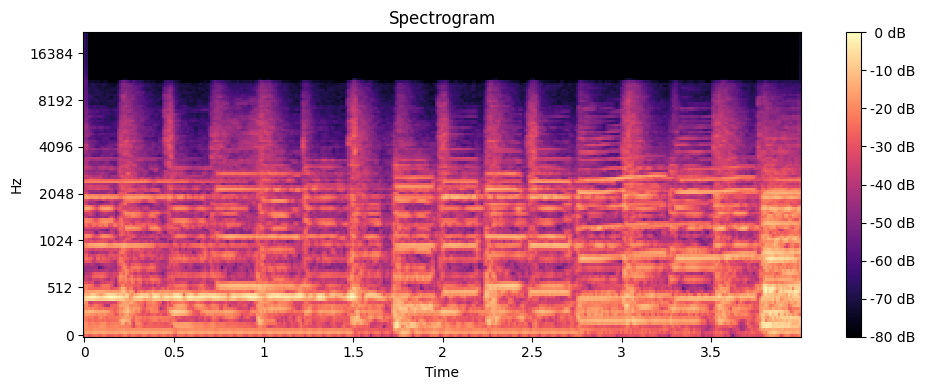

(128, 345)


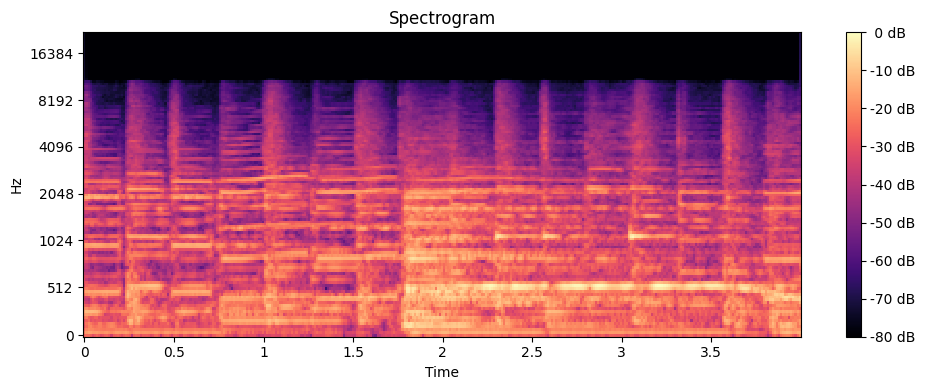

(128, 345)


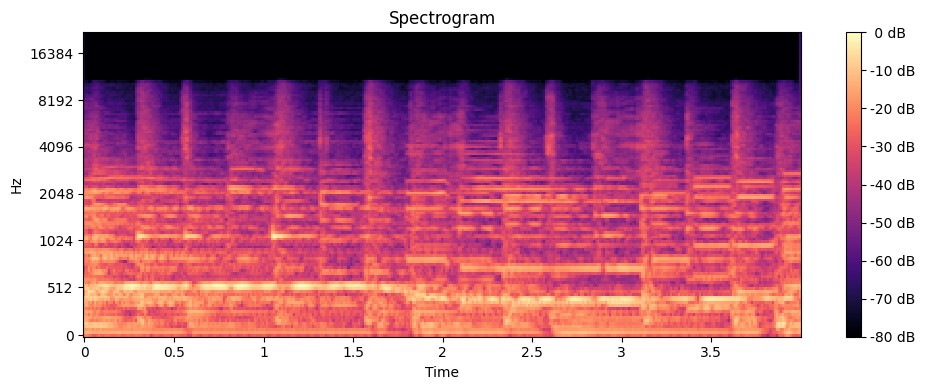

(128, 345)


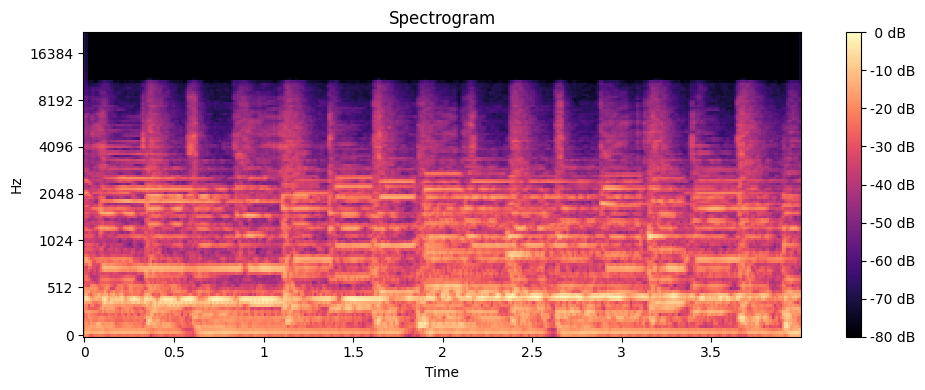

(128, 345)


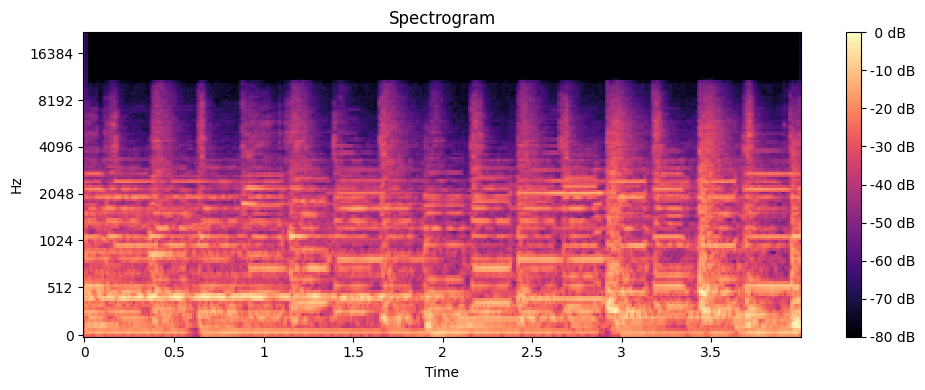

(128, 345)


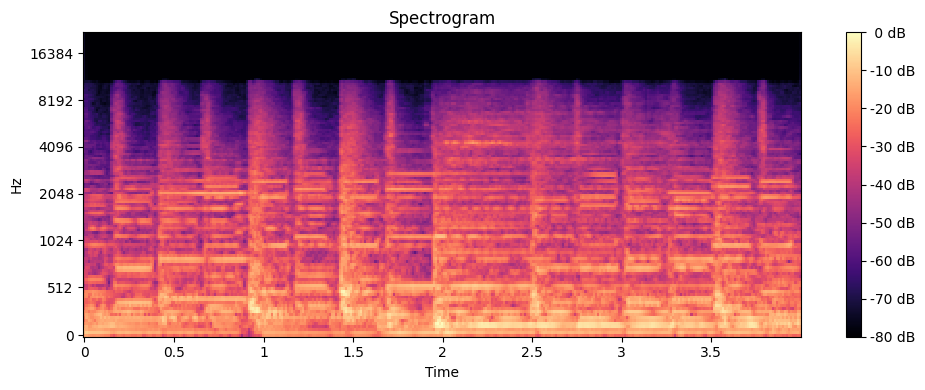

(128, 345)


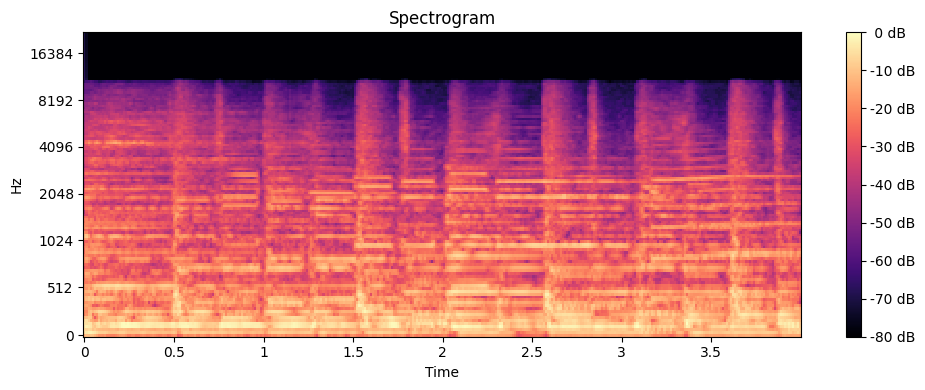

(128, 345)


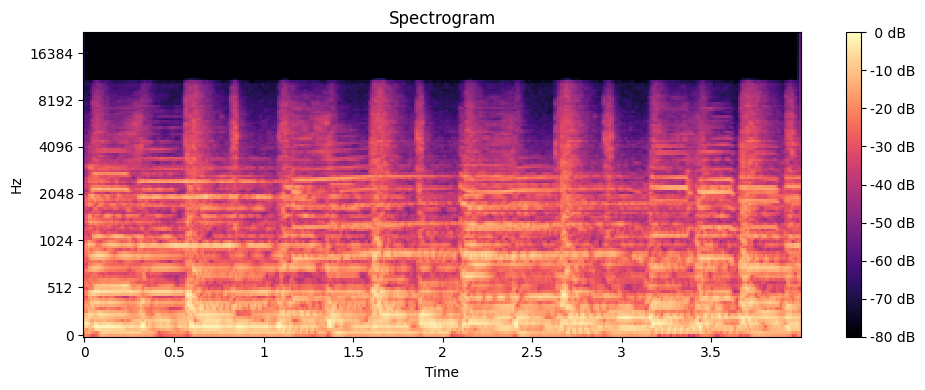

(128, 345)


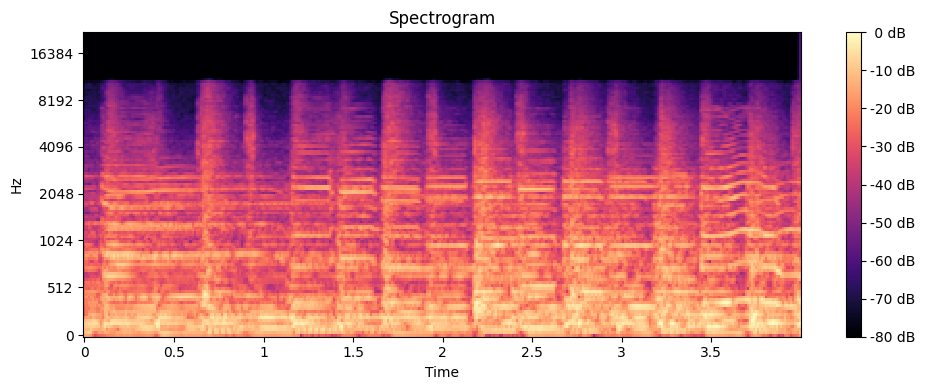

(128, 345)


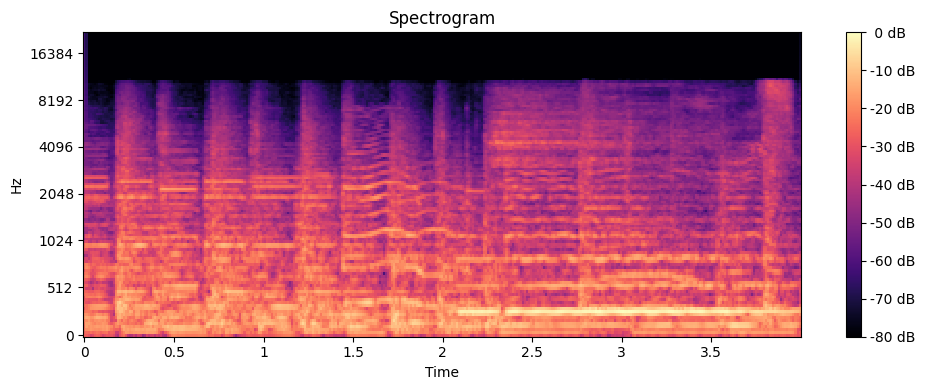

(128, 345)


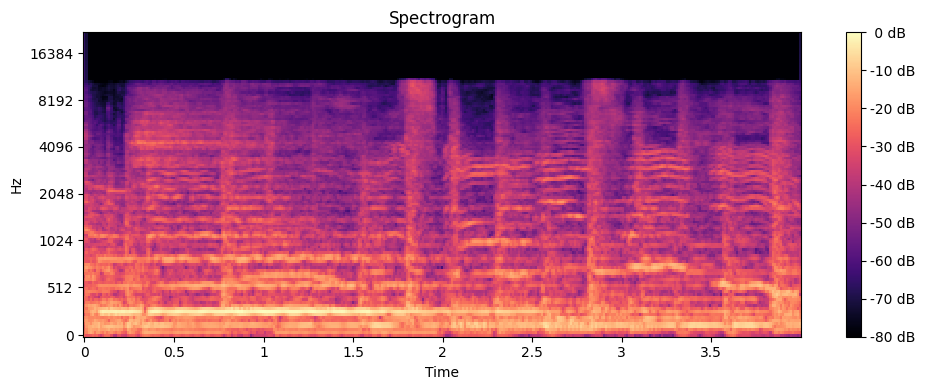

(128, 345)


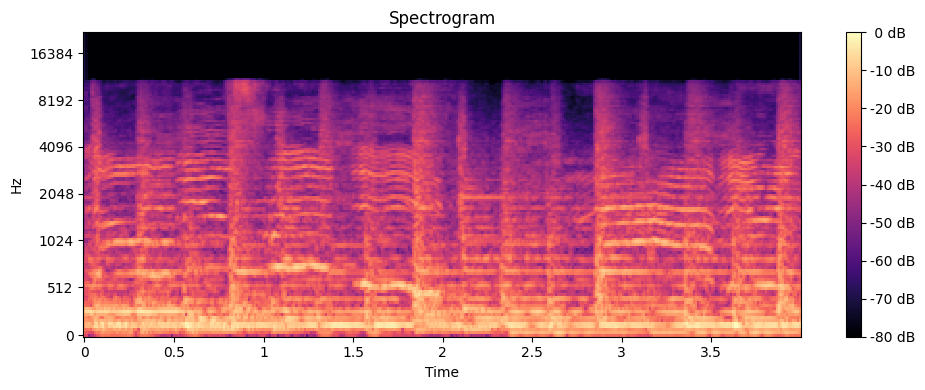

(128, 345)


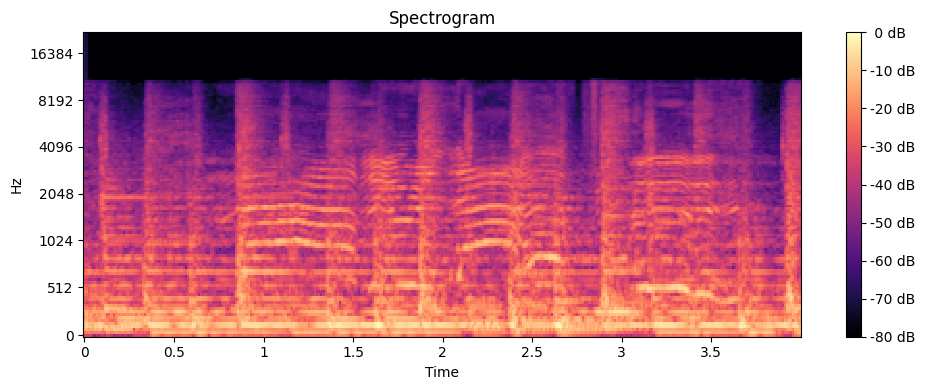

(128, 345)


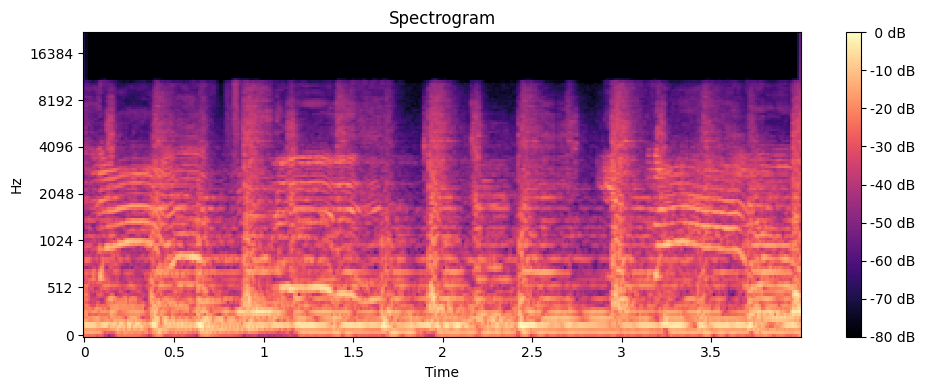

(128, 174)


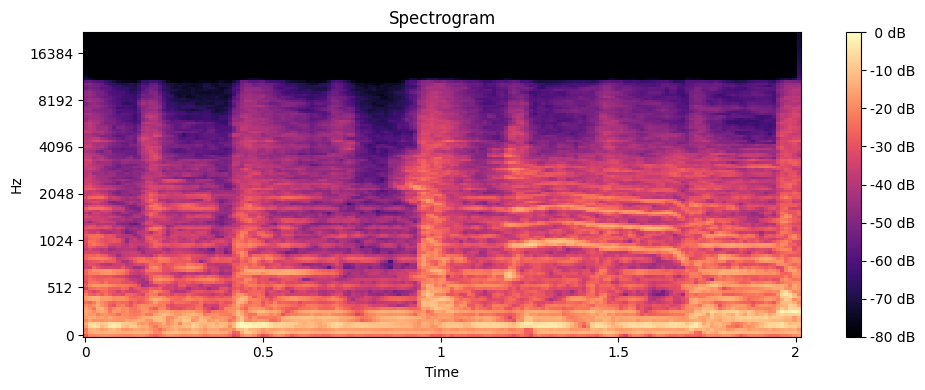

In [9]:
plot_melspectrogram_chunks(y,sr)

In [10]:
128*345 #take close enough dimension to this

44160

In [11]:
210*210

44100

## Data Preprocessing

In [12]:
data_dir = "genres_original"
# classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']
classes = ['hiphop','metal','rock']

In [13]:
from tensorflow.image import resize #resize for the above output dimension
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape 150 x 150
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [14]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- hiphop
Processing-- metal
Processing-- rock


In [15]:
data.shape

(3146, 150, 150, 1)

In [16]:
labels.shape

(3146,)

In [17]:
from tensorflow.keras.utils import to_categorical
#one hot encoding
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [18]:
labels.shape

(3146, 3)

## Splitting dataset into training and test set

In [19]:
from sklearn.model_selection import train_test_split
#80% training, 20% test set
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [20]:
X_train.shape

(2516, 150, 150, 1)

In [21]:
X_test.shape

(630, 150, 150, 1)

In [22]:
Y_train.shape

(2516, 3)

In [23]:
Y_test.shape

(630, 3)

## Building Model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
X_train[0].shape

In [ ]:
#padding to preserve data after using filter
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
#second layer to remove unwanted info
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
# max pooling use same as second layer but is more specific
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.3)) #drop 30% of neurons from that to deal with overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1200,activation='relu'))

In [ ]:
model.add(Dropout(0.45))

In [ ]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax')) #multiclass = softmax

In [ ]:
model.summary()

In [ ]:
#Compile the model
#multi class = categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

In [ ]:
model.save("Trained_model.keras") #Mac

In [ ]:
training_history.history

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
X_train

array([[[[1.50810738e+01],
         [1.21428032e+01],
         [7.53686571e+00],
         ...,
         [5.17475903e-01],
         [8.19101155e-01],
         [1.01151812e+00]],

        [[7.16481552e+01],
         [7.26679535e+01],
         [7.42665405e+01],
         ...,
         [1.12231379e+01],
         [1.25775204e+01],
         [1.34415264e+01]],

        [[7.10202560e+01],
         [7.23570480e+01],
         [7.44525604e+01],
         ...,
         [1.22221289e+01],
         [1.18366642e+01],
         [1.15907631e+01]],

        ...,

        [[6.02925196e-03],
         [4.35368577e-03],
         [1.72712246e-03],
         ...,
         [1.15553780e-06],
         [3.05198955e-06],
         [4.26180031e-06]],

        [[5.98154403e-03],
         [4.31922683e-03],
         [1.71343249e-03],
         ...,
         [2.13676344e-07],
         [1.60819923e-06],
         [2.49781237e-06]],

        [[5.94671397e-03],
         [4.29405458e-03],
         [1.70339935e-03],
         ...,
 

In [25]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [26]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [27]:
training_history_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Evaluation

In [28]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

79/79 [==============================] - 17s 208ms/step - loss: 0.0179 - accuracy: 0.9940


In [29]:
train_loss,train_accuracy

(0.017911391332745552, 0.9940381646156311)

In [30]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

20/20 [==============================] - 4s 204ms/step - loss: 0.1469 - accuracy: 0.9571


In [31]:
val_loss,val_accuracy

(0.14686618745326996, 0.9571428298950195)

In [32]:
training_history_data['val_loss']

[0.7811841368675232,
 0.4746262729167938,
 0.45892858505249023,
 0.3194752633571625,
 0.3488937318325043,
 0.2637766897678375,
 0.22618304193019867,
 0.19920197129249573,
 0.22117185592651367,
 0.16731661558151245,
 0.18949151039123535,
 0.14566682279109955,
 0.2347799688577652,
 0.16041035950183868,
 0.2337736338376999,
 0.12917156517505646,
 0.11746436357498169,
 0.15904730558395386,
 0.11650817096233368,
 0.17776820063591003,
 0.11218591034412384,
 0.10750577598810196,
 0.16248488426208496,
 0.14955440163612366,
 0.12876823544502258,
 0.12283775955438614,
 0.13657885789871216,
 0.139995276927948,
 0.11715362966060638,
 0.14686618745326996]

## Accuracy and Loss Visualization

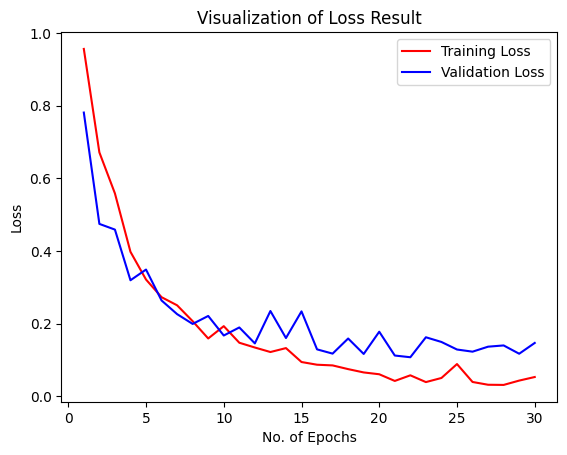

In [33]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

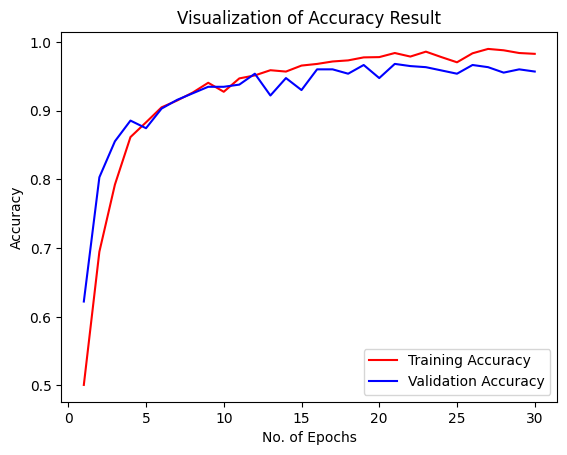

In [34]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Precision, Recall, Confusion Matrix

In [35]:
X_test.shape

(630, 150, 150, 1)

In [36]:
y_pred = model.predict(X_test)
y_pred

20/20 [==============================] - 4s 204ms/step


array([[6.39562003e-08, 1.13663795e-07, 9.99999881e-01],
       [1.00000000e+00, 2.35404180e-20, 6.11646338e-18],
       [1.83792395e-08, 1.00000000e+00, 8.55266880e-09],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37588931e-02, 2.11123768e-02, 9.65128660e-01],
       [2.34658495e-04, 9.99613464e-01, 1.51930857e-04]], dtype=float32)

In [37]:
y_pred.shape

(630, 3)

In [38]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1,

In [39]:
Y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [40]:
Y_test.shape

(630, 3)

In [41]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1,
       1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0,
       2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1,

In [42]:
classes

['hiphop', 'metal', 'rock']

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

      hiphop       0.98      0.96      0.97       226
       metal       0.94      0.98      0.96       205
        rock       0.95      0.92      0.94       199

    accuracy                           0.96       630
   macro avg       0.96      0.96      0.96       630
weighted avg       0.96      0.96      0.96       630



## Confusion Matrix Visualization

In [44]:
cm

array([[218,   1,   7],
       [  1, 201,   3],
       [  4,  11, 184]])

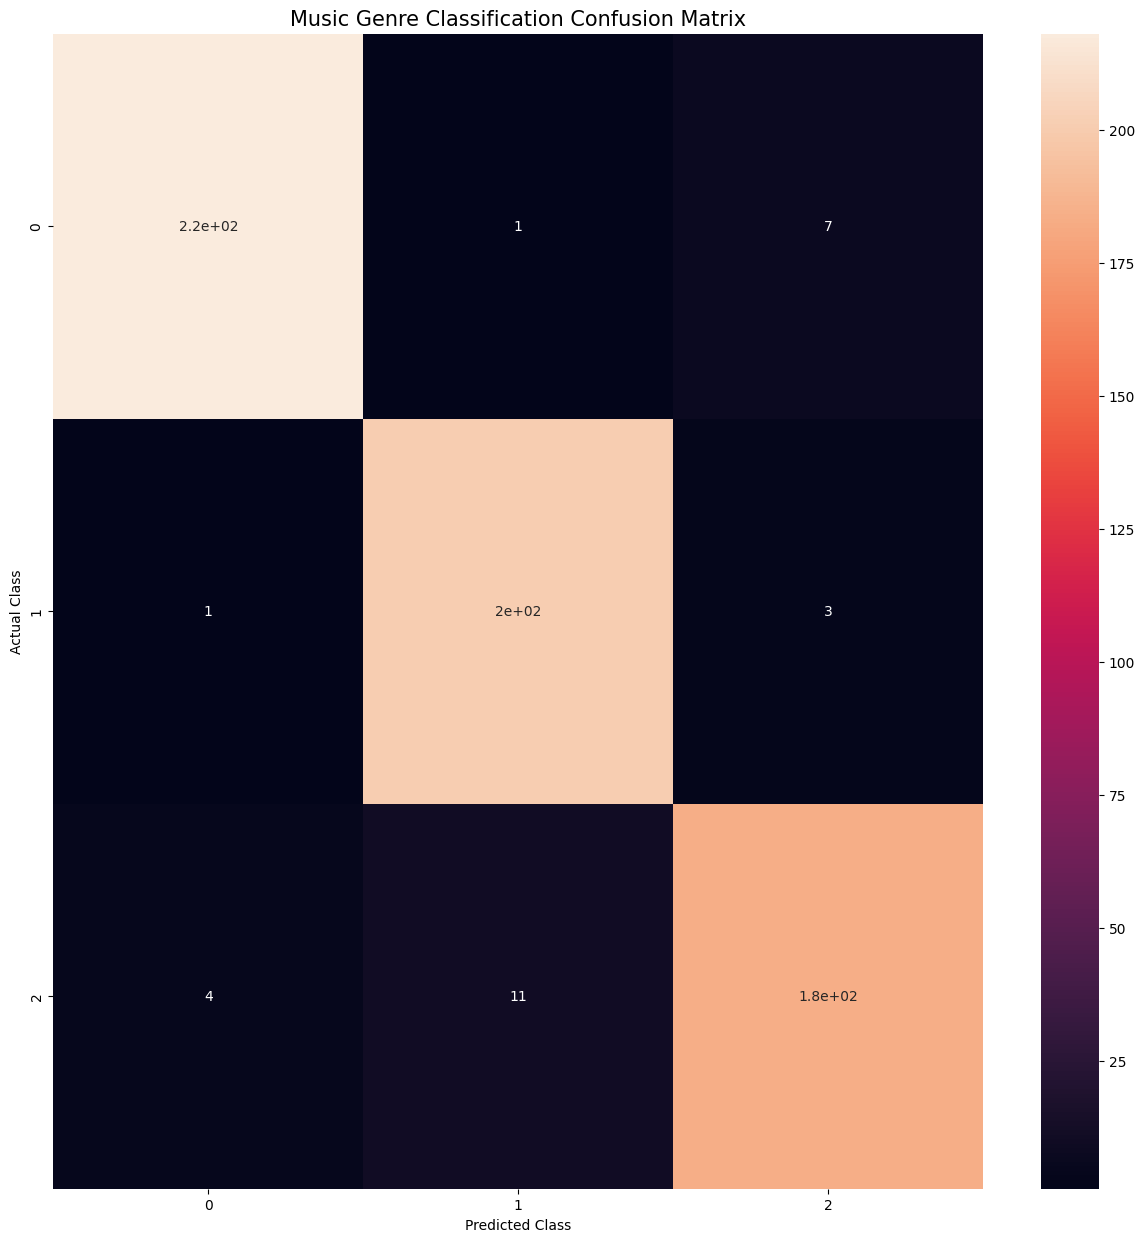

In [45]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()